# California Housing Dataset

---

## Objective
The objective of this notebook is to explore the California Housing dataset in order to understand distributions, relationships, spatial patterns, and potential data issues that may affect modeling.

This notebook focuses on identifying insights and validating assumptions defined in the dataset understanding stage.

---

## 1. Data Loading and Initial Inspection
**Tasks**
- Load the dataset.
- Check the number of rows and columns.
- Check the name of each column.
- Inspect the first and last records.

**What to observe**
- Confirm that each row represents a district.
- Verify that all expected columns are present.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, probplot, skew

In [2]:
df_housing = pd.read_csv("/home/trazeure/Notebooks/House_pricing/Data/housing.csv")

In [3]:
print(f"Number of rows:\n{df_housing.shape[0]}")
print(f"Number of columns:\n{df_housing.shape[1]}")

Number of rows:
20640
Number of columns:
10


In [4]:
print(f"Column names of the data set:\n{df_housing.columns}")

Column names of the data set:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [5]:
print(f"Last record of the data frame:\n{df_housing.iloc[0]}")

Last record of the data frame:
longitude              -122.23
latitude                 37.88
housing_median_age        41.0
total_rooms              880.0
total_bedrooms           129.0
population               322.0
households               126.0
median_income           8.3252
median_house_value    452600.0
ocean_proximity       NEAR BAY
Name: 0, dtype: object


In [6]:
print(f"First record of the data frame:\n{df_housing.iloc[-1]}")

First record of the data frame:
longitude             -121.24
latitude                39.37
housing_median_age       16.0
total_rooms            2785.0
total_bedrooms          616.0
population             1387.0
households              530.0
median_income          2.3886
median_house_value    89400.0
ocean_proximity        INLAND
Name: 20639, dtype: object


In [7]:
print(f"First 5 columns of the data frame:\n{df_housing.head()}")

First 5 columns of the data frame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## 2. Data Types and Missing Values
**Tasks**
- Identify data types of all features.
- Detect missing values per column.
- Calculate the percentage of missing data.

**What to observe**
- Columns with missing values (especially `total_bedrooms`).
- Whether missing values appear random or systematic.


In [8]:
print("Data type of each feature:")
df_housing.info()

Data type of each feature:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
print("Percentage of missing data:")
missing_percentage_per_column = df_housing.isnull().mean() * 100
print(missing_percentage_per_column)

Percentage of missing data:
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [10]:
median_bedrooms = df_housing["total_bedrooms"].median()
df_housing["total_bedrooms"] = df_housing["total_bedrooms"].fillna(median_bedrooms)

In [11]:
print("Percentage of missing data after filling values of total_bedrooms:")
missing_percentage_per_column = df_housing.isnull().mean() * 100
print(missing_percentage_per_column)

Percentage of missing data after filling values of total_bedrooms:
longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64


## 3. Target Variable Analysis: `median_house_value`
**Tasks**
- Analyze the distribution of the target variable.
- Identify skewness and potential capping.
- Compare mean vs median.

**What to observe**
- Right-skewed distribution.
- Presence of a maximum cap value.
- Outliers at high values.

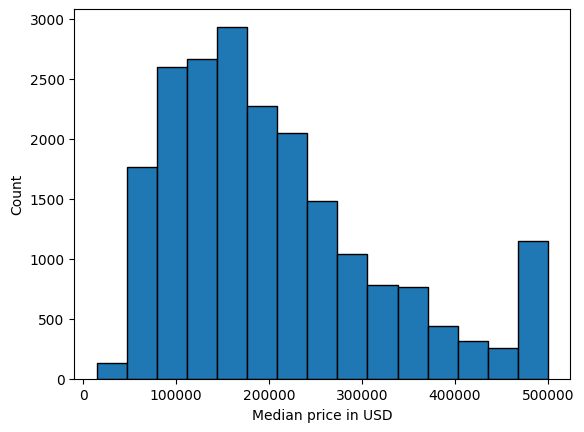

In [12]:
plt.hist(df_housing["median_house_value"], bins=15, edgecolor="black")
plt.xlabel("Median price in USD")
plt.ylabel("Count")
plt.show()

In [13]:
# Calculate skewness and kurtosis
median_house_value = df_housing["median_house_value"]

summary = pd.DataFrame(
    {
        "Skewness": [skew(median_house_value)],
        "Excess Kurtosis": [kurtosis(median_house_value)],
    },
    index=["median_house_value"],
)

summary

,Skewness,Excess Kurtosis
median_house_value,0.977692,0.3275


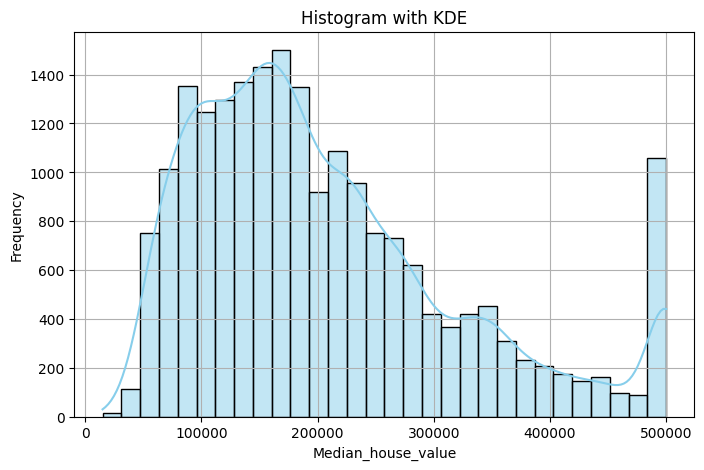

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(median_house_value, kde=True, bins=30, color="skyblue")
plt.title(f"Histogram with KDE")
plt.xlabel("Median_house_value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

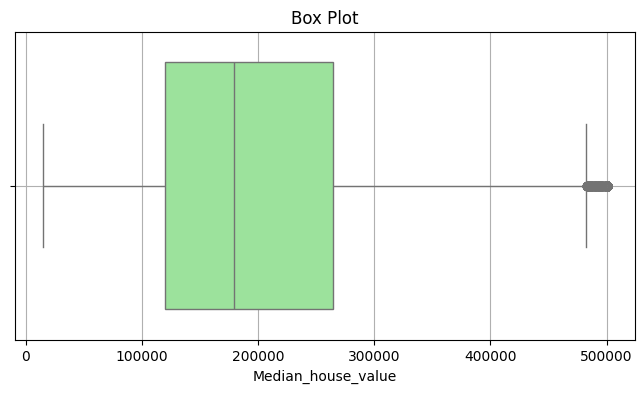

In [15]:
# Plot box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=median_house_value, color="lightgreen")
plt.title("Box Plot")
plt.xlabel("Median_house_value")
plt.grid(True)
plt.show()

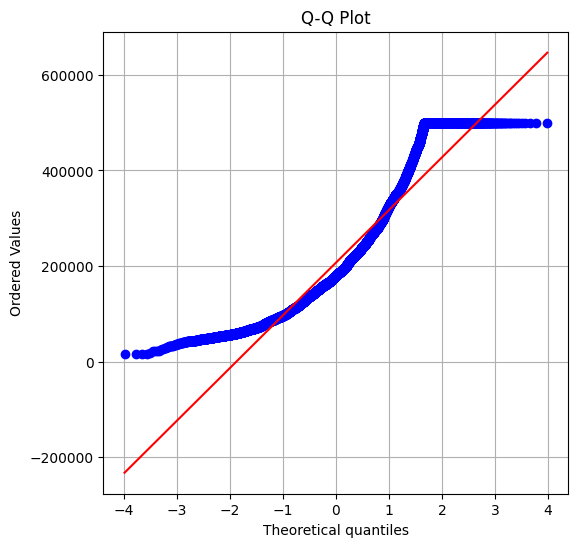

In [16]:
# Q-Q plot to check normality
plt.figure(figsize=(6, 6))
probplot(median_house_value, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(True)
plt.show()

In [17]:
mean_median = pd.DataFrame(
    {"mean": [median_house_value.mean()], "median": [median_house_value.median()]},
    index=["median_house_value"],
)
mean_median

,mean,median
median_house_value,206855.816909,179700.0


## 4. Univariate Analysis of Numerical Features
**Tasks**
- Analyze distributions of numerical variables.
- Identify outliers and unusual values.
- Observe scale differences across features.

**What to observe**
- Long-tailed distributions in room and population features.
- Features with very different ranges.

In [18]:
# Distributions
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


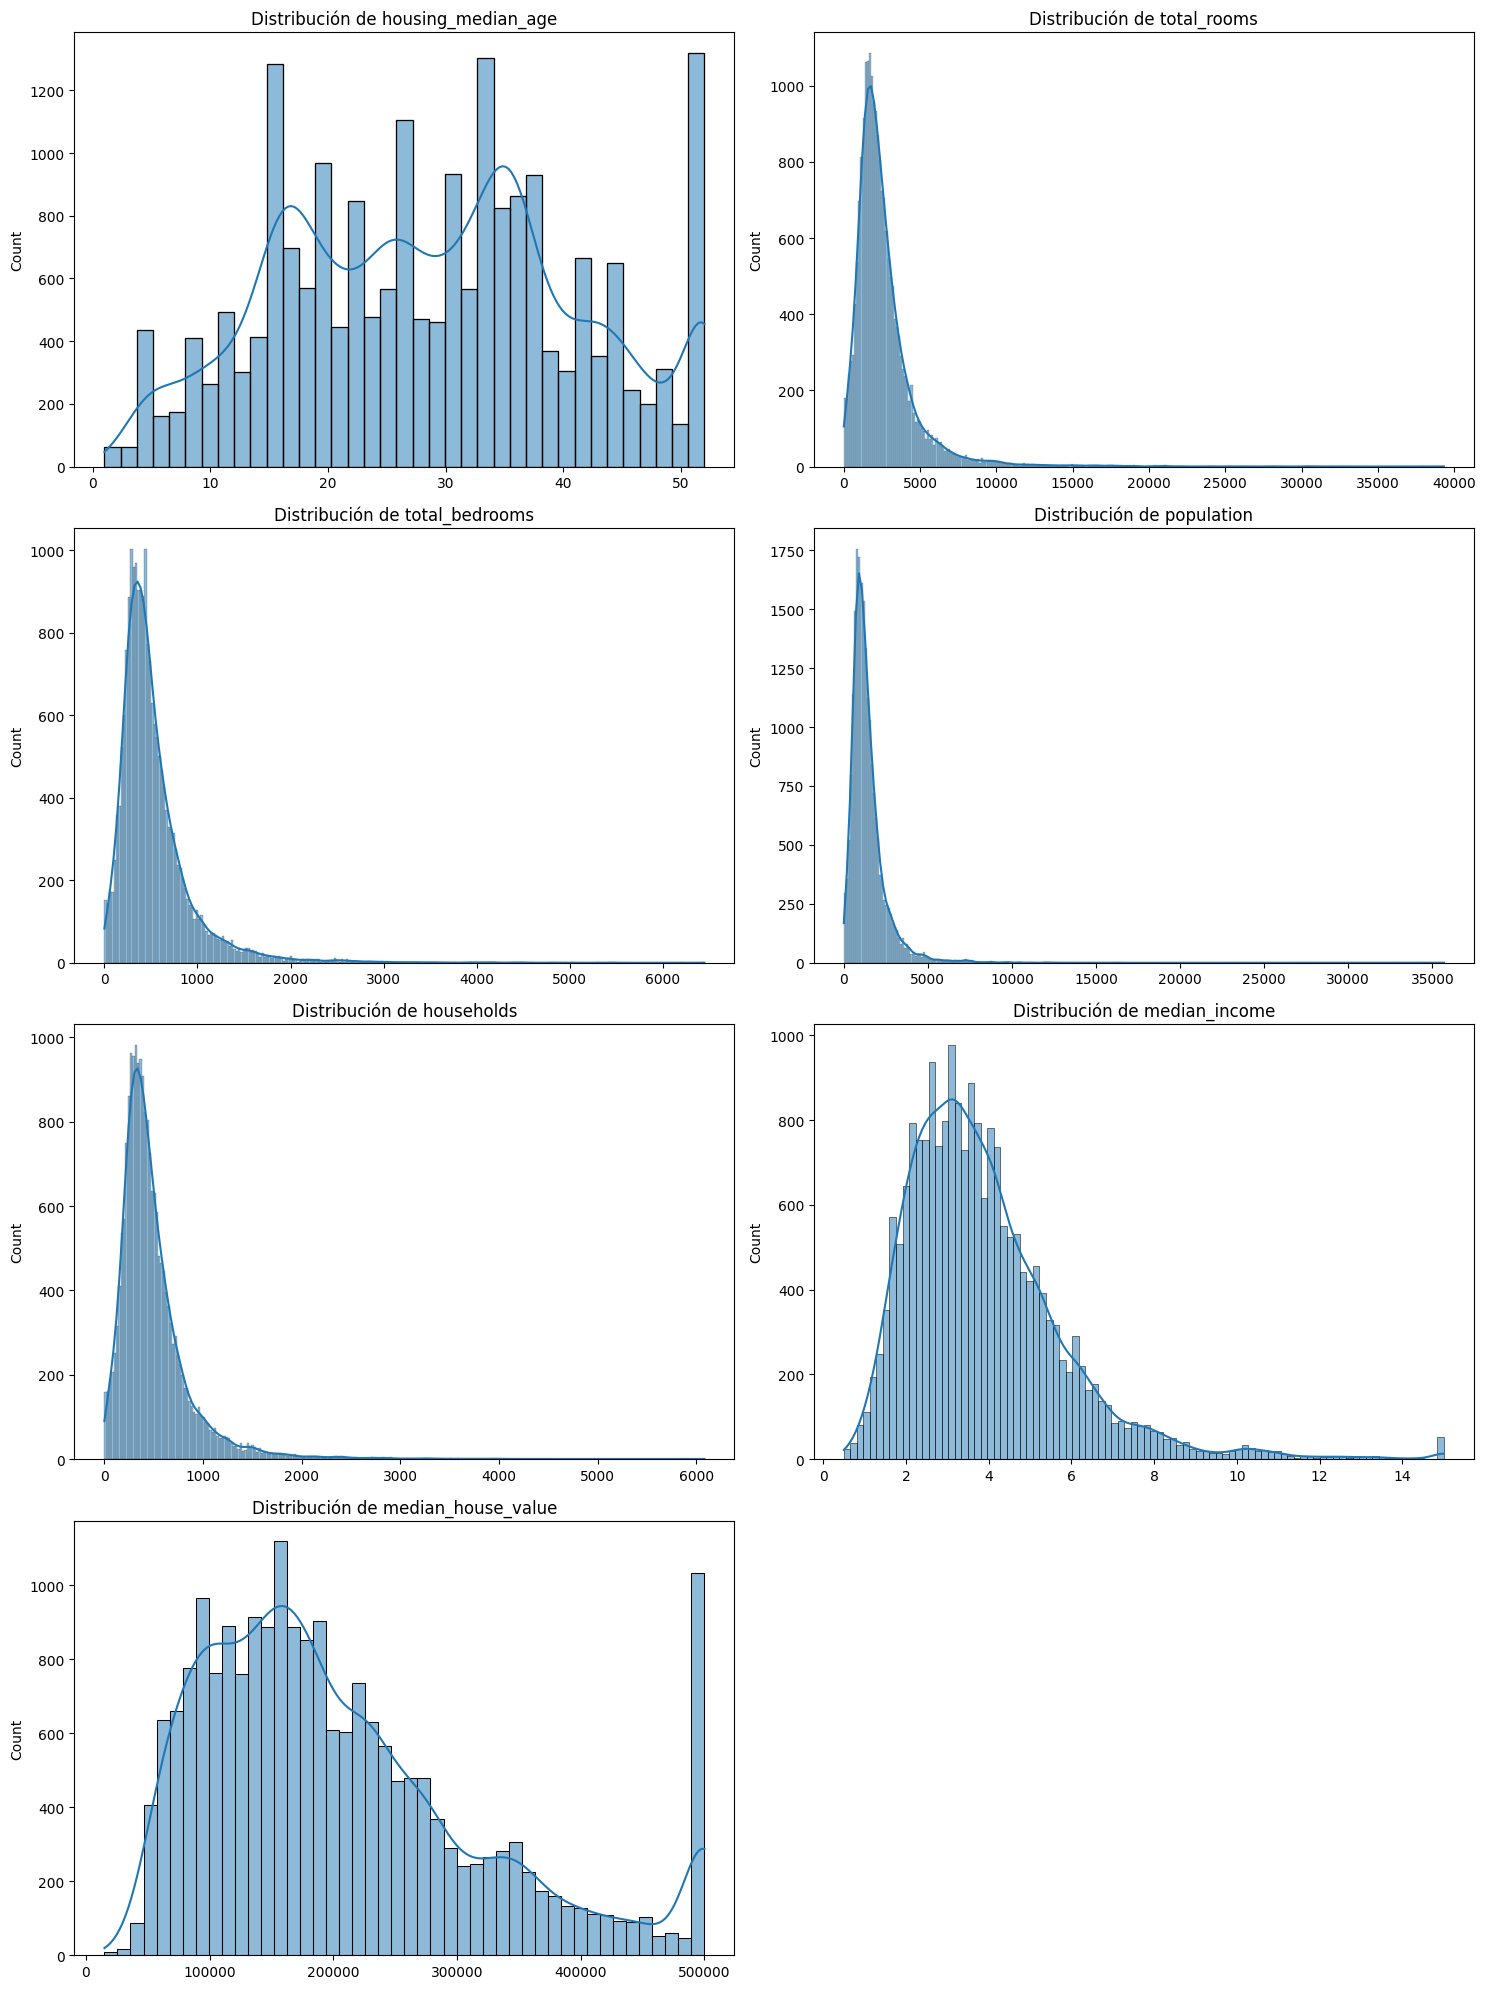

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value",
]


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flat

for i, col in enumerate(cols):
    sns.histplot(df_housing[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("")

if len(cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

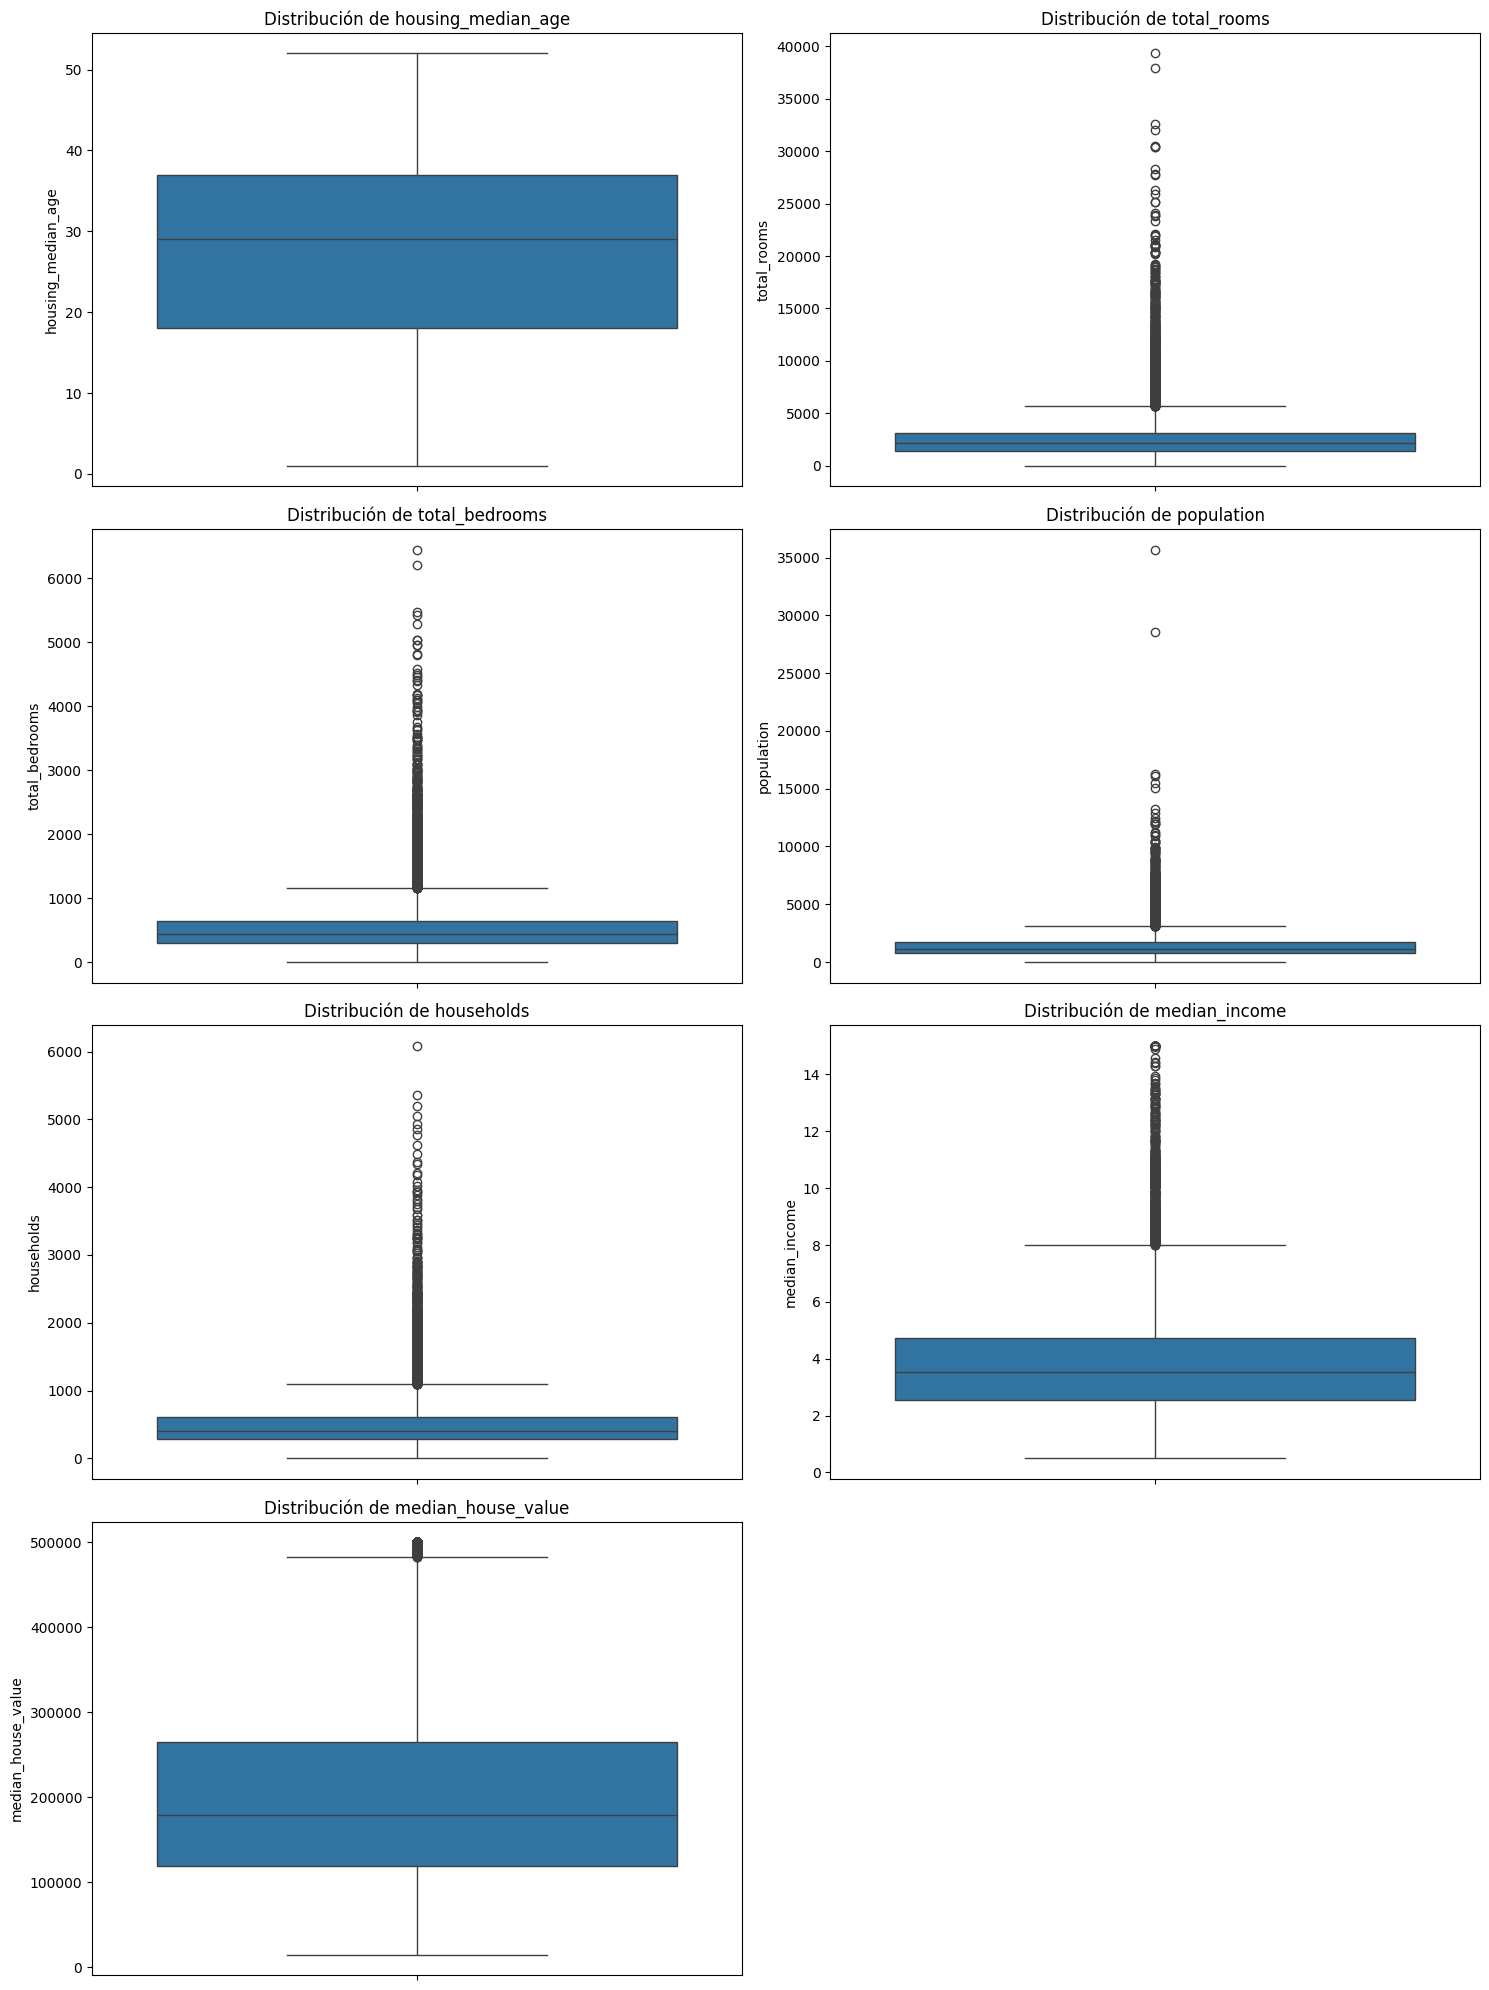

In [20]:
cols = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value",
]


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flat

for i, col in enumerate(cols):
    sns.boxplot(df_housing[col], ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("")

if len(cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

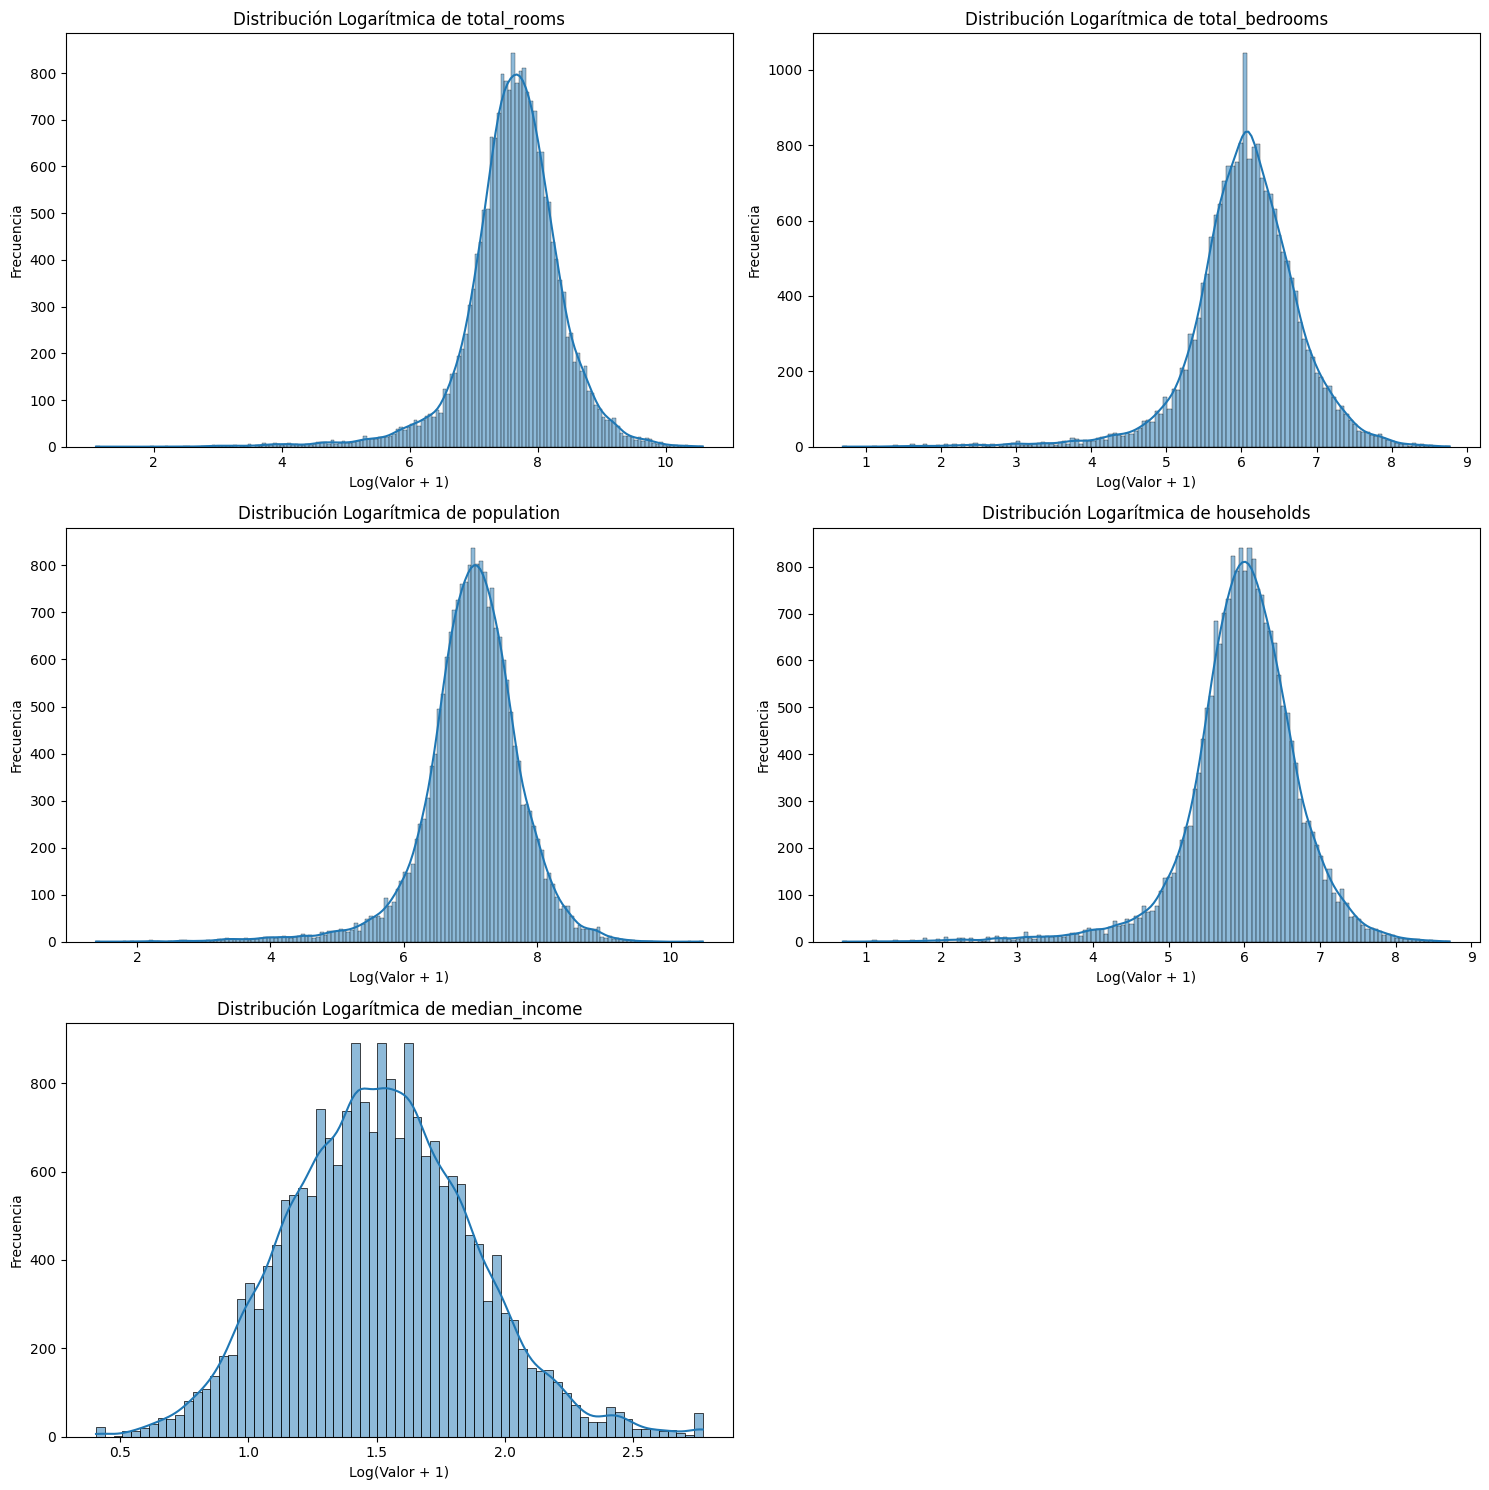

In [21]:
# 1. Asegúrate de que el nombre de la lista sea consistente
cols_distribution = [
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
]

# 2. Configuramos los subplots (ajusté a 3x2 para que quepan bien las 5 variables)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flat

for i, col in enumerate(cols_distribution):
    # CORRECCIÓN: Aplicamos log1p solo a la columna actual 'col'
    sns.histplot(np.log1p(df_housing[col]), ax=axes[i], kde=True)

    axes[i].set_title(f"Distribución Logarítmica de {col}")
    axes[i].set_xlabel("Log(Valor + 1)")
    axes[i].set_ylabel("Frecuencia")

# 3. Eliminar ejes sobrantes (si hay 5 variables y 6 espacios)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Resumen Estadístico:
       housing_median_age   total_rooms  total_bedrooms    population  \
count        20640.000000  20640.000000    20640.000000  20640.000000   
mean            28.639486   2635.763081      536.838857   1425.476744   
std             12.585558   2181.615252      419.391878   1132.462122   
min              1.000000      2.000000        1.000000      3.000000   
25%             18.000000   1447.750000      297.000000    787.000000   
50%             29.000000   2127.000000      435.000000   1166.000000   
75%             37.000000   3148.000000      643.250000   1725.000000   
max             52.000000  39320.000000     6445.000000  35682.000000   

         households  median_income  median_house_value  
count  20640.000000   20640.000000        20640.000000  
mean     499.539680       3.870671       206855.816909  
std      382.329753       1.899822       115395.615874  
min        1.000000       0.499900        14999.000000  
25%      280.000000       2.563400  

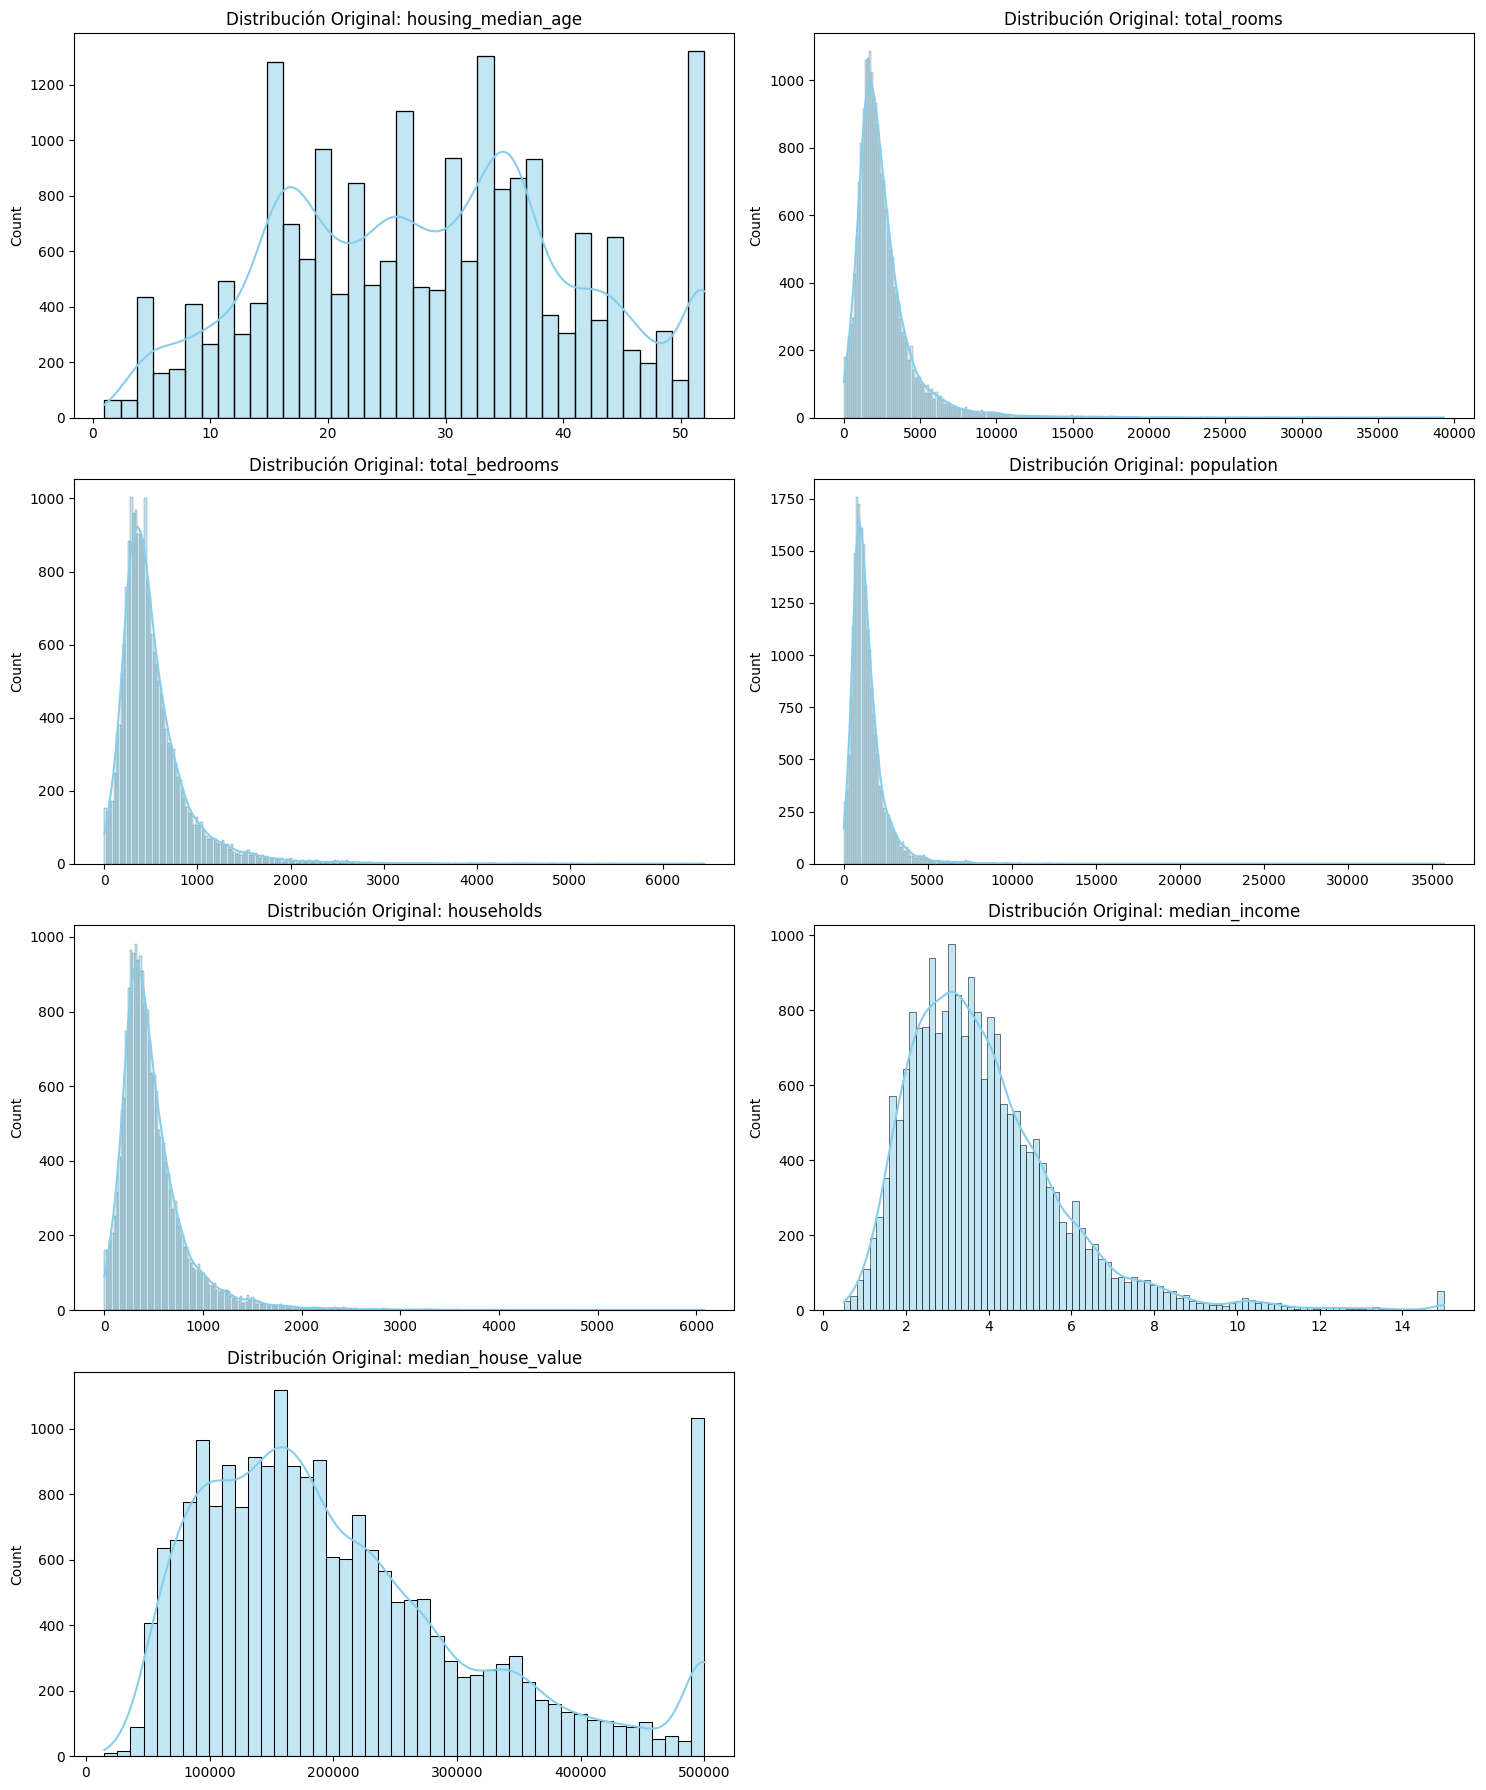

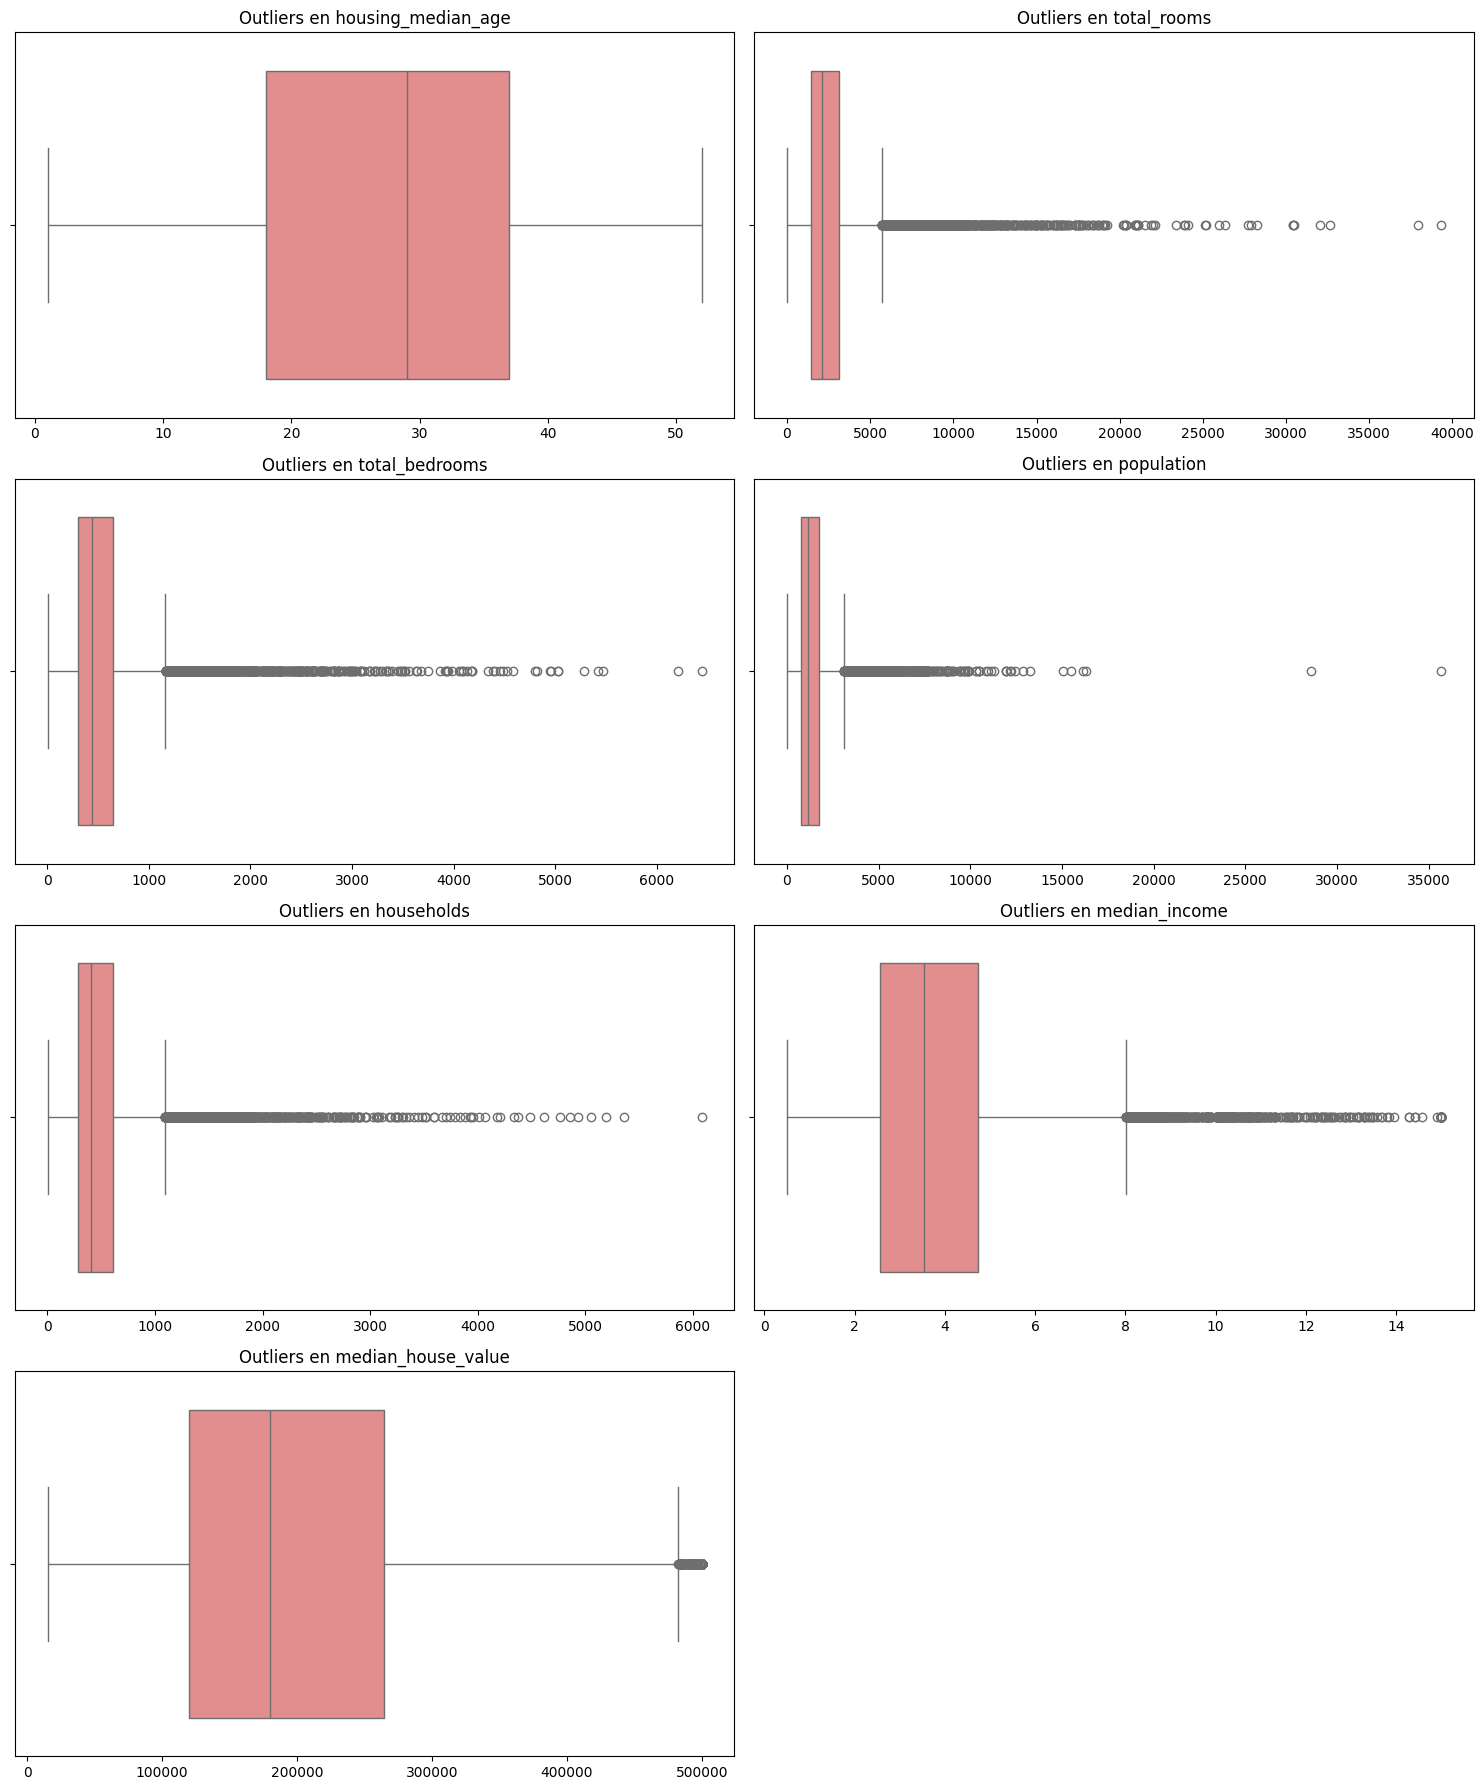

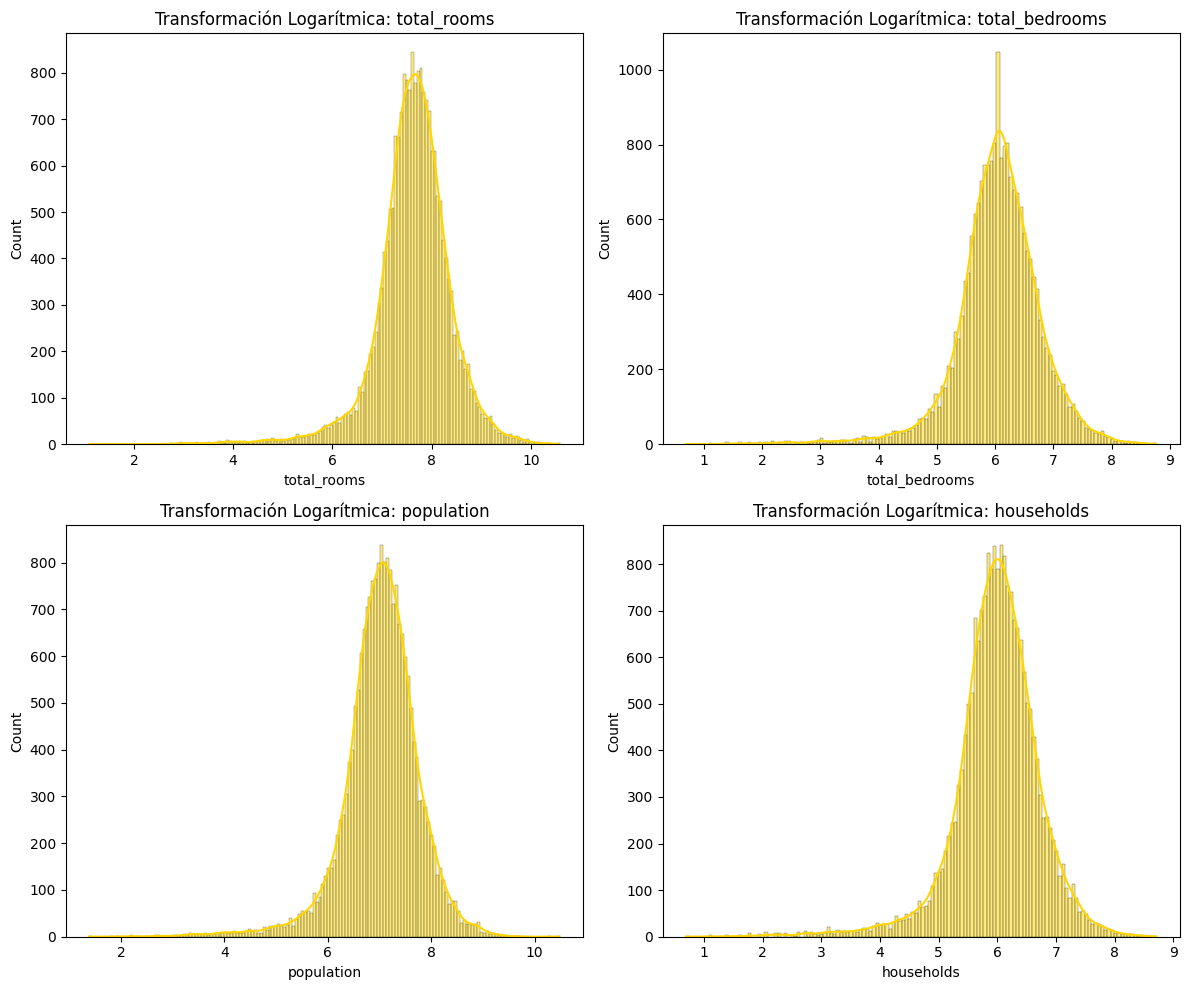

In [22]:
# 1. Definimos las columnas numéricas que queremos analizar
cols_num = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value",
]

# ---------------------------------------------------------
# PASO A: ESTADÍSTICA DESCRIPTIVA (La "Lupa" numérica)
# ---------------------------------------------------------
print("Resumen Estadístico:")
print(df_housing[cols_num].describe())

# ---------------------------------------------------------
# PASO B: DISTRIBUCIÓN ORIGINAL (Para ver el sesgo/colas largas)
# ---------------------------------------------------------
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flat

for i, col in enumerate(cols_num):
    sns.histplot(df_housing[col], ax=axes[i], kde=True, color="skyblue")
    axes[i].set_title(f"Distribución Original: {col}", fontsize=12)
    axes[i].set_xlabel("")

# Eliminamos el último espacio si sobra
if len(cols_num) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# PASO C: OUTLIERS Y ESCALAS (Boxplots)
# ---------------------------------------------------------
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flat

for i, col in enumerate(cols_num):
    sns.boxplot(x=df_housing[col], ax=axes[i], color="lightcoral")
    axes[i].set_title(f"Outliers en {col}", fontsize=12)
    axes[i].set_xlabel("")

if len(cols_num) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# PASO D: SOLUCIÓN A COLA LARGA (Transformación Logarítmica)
# ---------------------------------------------------------
# Analizamos solo las que detectamos con mucha "cola" en el Paso B
cols_log = ["total_rooms", "total_bedrooms", "population", "households"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flat

for i, col in enumerate(cols_log):
    # Aplicamos log1p (logaritmo de x+1 para evitar problemas con ceros)
    sns.histplot(np.log1p(df_housing[col]), ax=axes[i], kde=True, color="gold")
    axes[i].set_title(f"Transformación Logarítmica: {col}", fontsize=12)

plt.tight_layout()
plt.show()

### 4.1 Univariate Analysis Based on the visualizations and statistical summaries, we can conclude the following:

1. Distribution and Skewness
Most features related to size and density (e.g., total_rooms, population, households) exhibit a significant right-skew (Long-tailed distribution). This means that while most districts are small or medium-sized, there are a few "megadistricts" that stretch the data.

Action Taken: A Logarithmic Transformation (log1p) was tested on these features, successfully normalizing the distributions and reducing the impact of extreme values.

2. Outlier Detection
The Boxplots reveal a high density of outliers, particularly in median_income and population.

Critical Observation: The median_house_value shows a suspicious "cap" or limit at 500,000. This suggests that values above this threshold were rounded down during data collection, which could introduce bias if not handled.

3. Scale Variance
There are massive differences in scales across features. For instance, median_income ranges from 0 to 15, while population goes into the thousands.

Future Strategy: To ensure the machine learning model treats all features equally, we must apply Feature Scaling (such as StandardScaler or MinMaxScaler) in the pre-processing phase.

## 5. Geographic Analysis (Spatial Patterns)
**Tasks**
- Analyze house values by latitude and longitude.
- Identify regional clusters of high and low prices.

**What to observe**
- Coastal vs inland price differences.
- Urban vs rural spatial patterns.

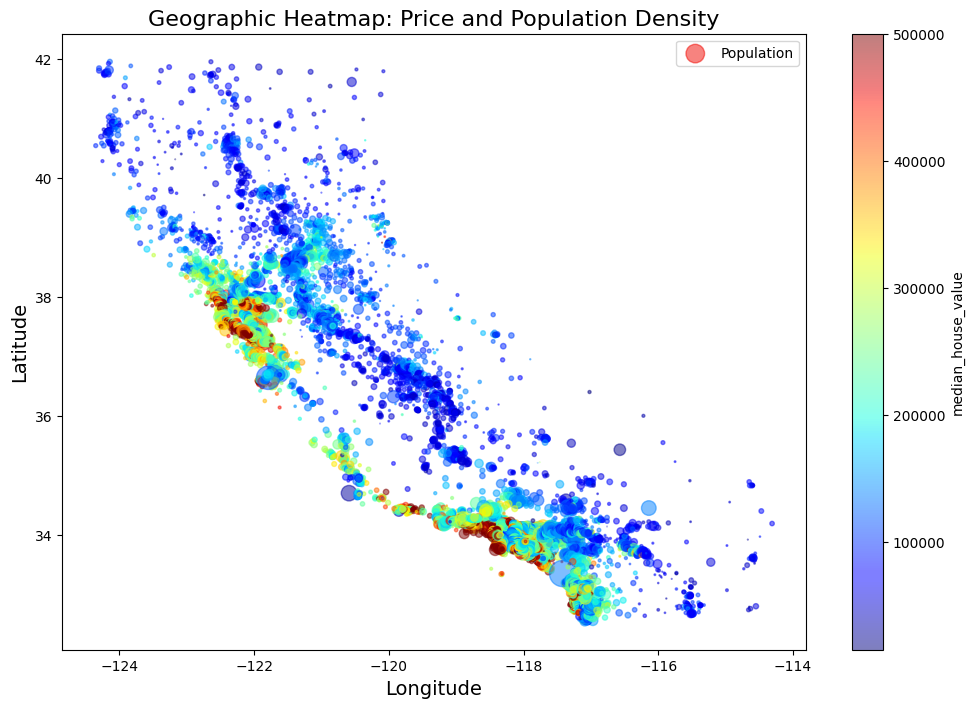

In [23]:
# Graph
df_housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    figsize=(12, 8),
    alpha=0.5,
    s=df_housing["population"] / 100,
    label="Population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

plt.title("Geographic Heatmap: Price and Population Density", fontsize=16)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend()
plt.show()

The geographical analysis reveals a clear spatial correlation between location and price. High-priced clusters are predominantly located along the coastline and within major metropolitan areas like Los Angeles and the Bay Area. In contrast, inland regions display lower prices and lower population density, suggesting that proximity to the ocean and urban centers are the most influential geographical factors for house valuation.

## 6. Categorical Feature Analysis: `ocean_proximity`
**Tasks**
- Analyze category frequencies.
- Compare house values across categories.

**What to observe**
- Which categories are associated with higher prices.
- Price variability within each category.


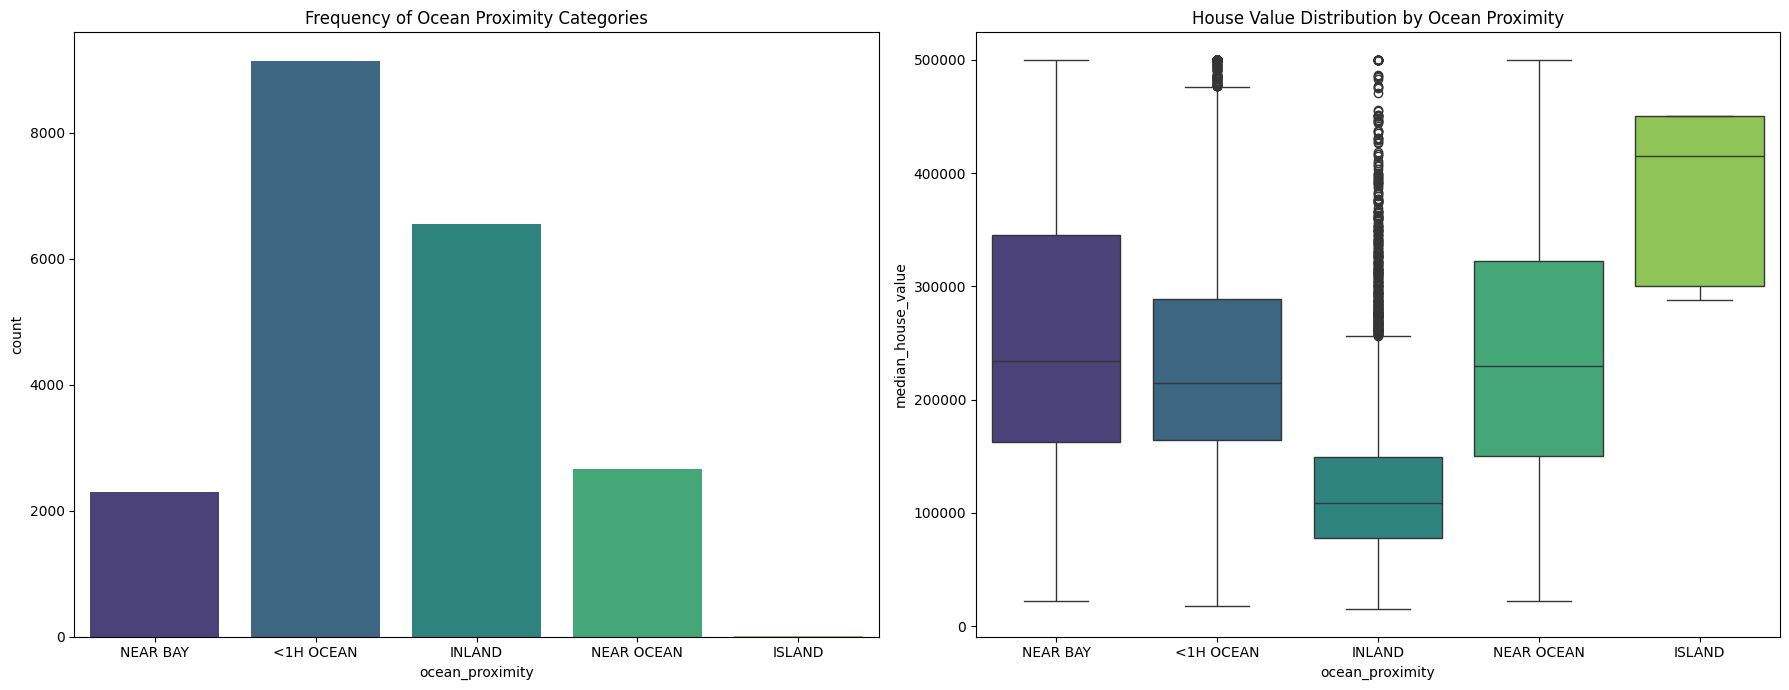

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))


sns.countplot(
    data=df_housing,
    x="ocean_proximity",
    hue="ocean_proximity",
    ax=axes[0],
    palette="viridis",
    legend=False,
)
axes[0].set_title("Frequency of Ocean Proximity Categories")

sns.boxplot(
    data=df_housing,
    x="ocean_proximity",
    y="median_house_value",
    hue="ocean_proximity",
    ax=axes[1],
    palette="viridis",
    legend=False,
)
axes[1].set_title("House Value Distribution by Ocean Proximity")

plt.tight_layout()
plt.show()

## 7. Relationship Between Numerical Features and Target
**Tasks**
- Analyze how numerical features relate to `median_house_value`.
- Identify linear and non-linear relationships.

**What to observe**
- Strong relationship with `median_income`.
- Weak or noisy relationships with raw counts.


Correlation with Price:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


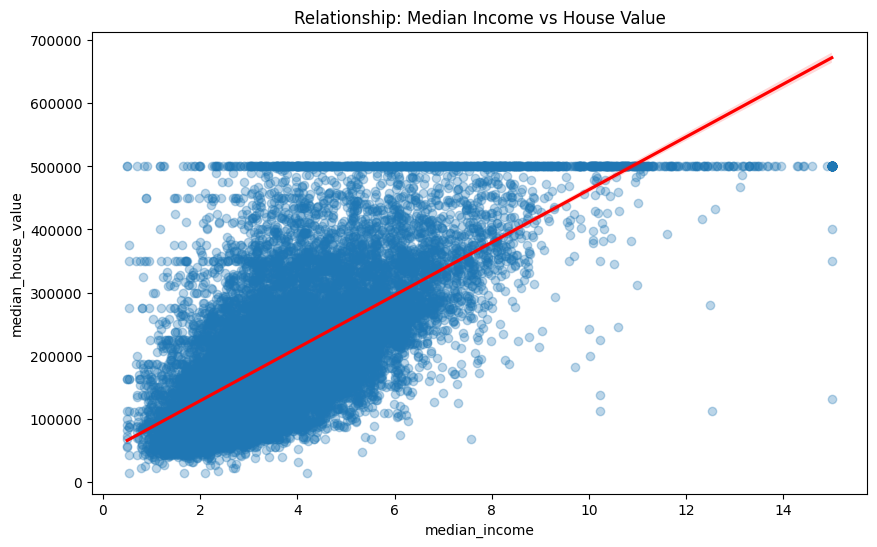

In [25]:
# 1. Calculamos la correlación enfocada en el precio
correlation_matrix = df_housing.corr(numeric_only=True)
price_correlations = correlation_matrix["median_house_value"].sort_values(
    ascending=False
)

print("Correlation with Price:")
print(price_correlations)

# 2. Visualizamos la relación más fuerte (Income vs Price)
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_housing,
    x="median_income",
    y="median_house_value",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"},
)
plt.title("Relationship: Median Income vs House Value")
plt.show()

In [26]:
# Creando las nuevas combinaciones
df_housing["rooms_per_household"] = df_housing["total_rooms"] / df_housing["households"]
df_housing["bedrooms_per_room"] = (
    df_housing["total_bedrooms"] / df_housing["total_rooms"]
)
df_housing["population_per_household"] = (
    df_housing["population"] / df_housing["households"]
)

# Ahora revisamos la correlación de nuevo para ver si mejoró
new_corr_matrix = df_housing.corr(numeric_only=True)
print(new_corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64


## 8. Feature Normalization Insight (Conceptual)
**Tasks**
- Evaluate whether raw features need normalization.
- Identify features that should be expressed per household.

**What to observe**
- Total counts that depend on district size.
- Ratios that may better capture underlying relationships.

In [27]:
# 1. Creamos las variables por hogar (per household)
df_housing["rooms_per_household"] = df_housing["total_rooms"] / df_housing["households"]
df_housing["population_per_household"] = (
    df_housing["population"] / df_housing["households"]
)
df_housing["bedrooms_per_room"] = (
    df_housing["total_bedrooms"] / df_housing["total_rooms"]
)

In [28]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las columnas numéricas que queremos escalar
# (No incluimos la variable objetivo 'median_house_value' ni las categóricas)
scaler = StandardScaler()
cols_to_scale = [
    "housing_median_age",
    "rooms_per_household",
    "population_per_household",
    "bedrooms_per_room",
    "median_income",
]

# Aplicamos el escalador
df_housing_scaled = df_housing.copy()
df_housing_scaled[cols_to_scale] = scaler.fit_transform(df_housing[cols_to_scale])

print("Datos escalados (Primeras 5 filas):")
print(df_housing_scaled[cols_to_scale].head())

Datos escalados (Primeras 5 filas):
   housing_median_age  rooms_per_household  population_per_household  \
0            0.982143             0.628559                 -0.049597   
1           -0.607019             0.327041                 -0.092512   
2            1.856182             1.155620                 -0.025843   
3            1.856182             0.156966                 -0.050329   
4            1.856182             0.344711                 -0.085616   

   bedrooms_per_room  median_income  
0          -1.029988       2.344766  
1          -0.888897       2.332238  
2          -1.291686       1.782699  
3          -0.449613       0.932968  
4          -0.639087      -0.012881  


In [29]:
median_bedrooms = df_housing["total_bedrooms"].median()
df_housing["total_bedrooms"] = df_housing["total_bedrooms"].fillna(median_bedrooms)

print("Valores nulos después de la limpieza:")
print(df_housing.isnull().sum())

Valores nulos después de la limpieza:
longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64


## 9. Correlation Analysis
**Tasks**
- Compute correlations among numerical features.
- Identify multicollinearity.

**What to observe**
- Strong correlations among room-related features.
- Features highly correlated with the target.

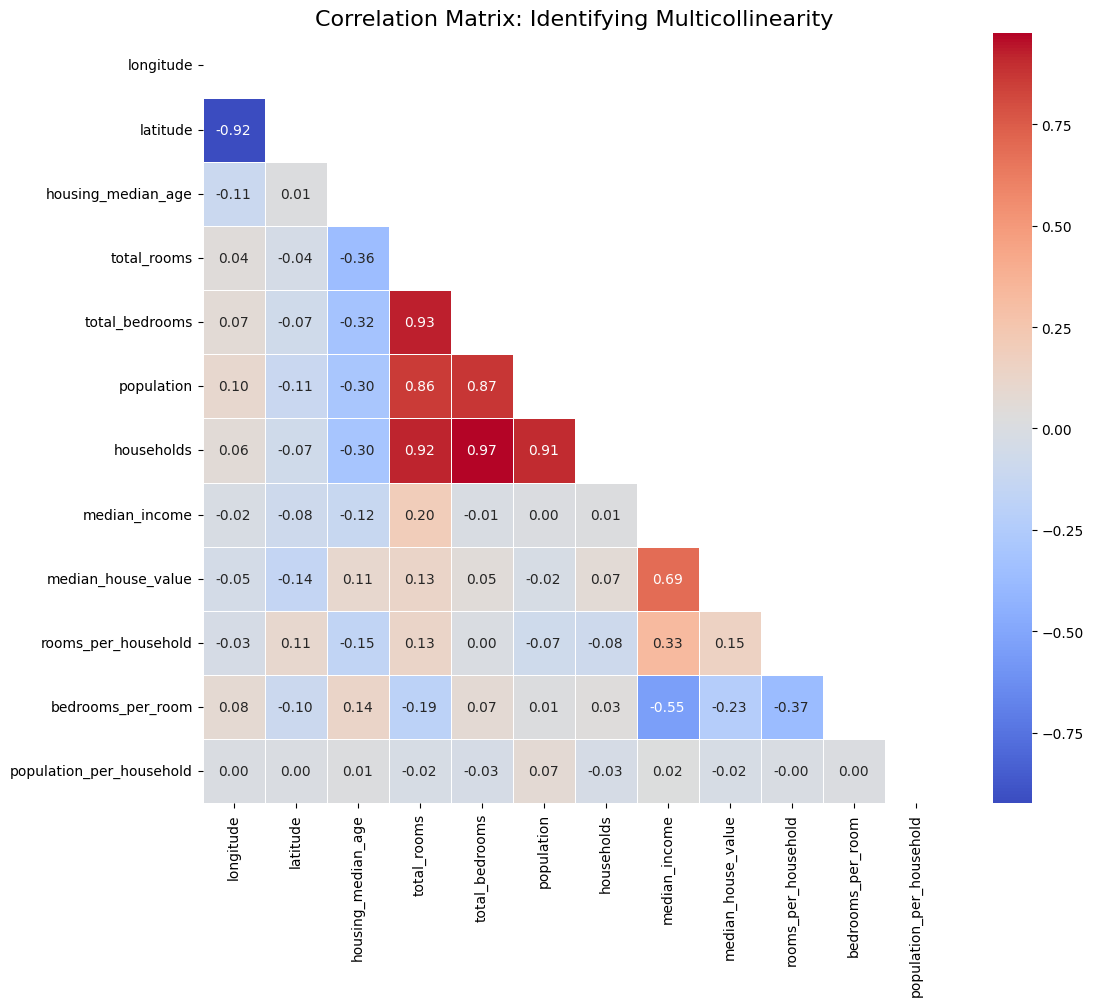

Variables con alta correlación (posible redundancia):
           level_0         level_1         0
4      total_rooms  total_bedrooms  0.927058
5      total_rooms      households  0.918484
6   total_bedrooms     total_rooms  0.927058
8   total_bedrooms      households  0.974366
10      population      households  0.907222
11      households     total_rooms  0.918484
12      households  total_bedrooms  0.974366
13      households      population  0.907222


In [30]:
corr_matrix = df_housing.corr(numeric_only=True)

# Configuramos el lienzo
plt.figure(figsize=(12, 10))

# Creamos una "máscara" para ver solo la mitad inferior (opcional, pero se ve más limpio)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Dibujamos el Heatmap
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True,          # Muestra los números dentro de los cuadros
            fmt=".2f",           # Formato de 2 decimales
            cmap='coolwarm',     # Colores: Rojo (Positivo), Azul (Negativo)
            linewidths=0.5)

plt.title('Correlation Matrix: Identifying Multicollinearity', fontsize=16)
plt.show()

# --- Identificar Multicolinealidad ---
print("Variables con alta correlación (posible redundancia):")
# Buscamos variables con correlación > 0.90
high_corr = corr_matrix[corr_matrix > 0.90].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
print(high_corr)

## 10. Outlier Investigation
**Tasks**
- Identify districts with extreme values.
- Inspect whether outliers represent valid data or anomalies.

**What to observe**
- High population with low housing value.
- Extreme room counts relative to households.


Distritos con ratio de habitaciones extremo (>15): 109
      total_rooms  households  rooms_per_household  median_house_value
1024       3045.0       102.0            29.852941            140600.0
1102        858.0        27.0            31.777778             67500.0
1233       3757.0       223.0            16.847534            121400.0
1234       2962.0       103.0            28.757282            155800.0
1238       3486.0       124.0            28.112903            103800.0

Distritos con alta densidad poblacional (>10 personas/hogar): 37


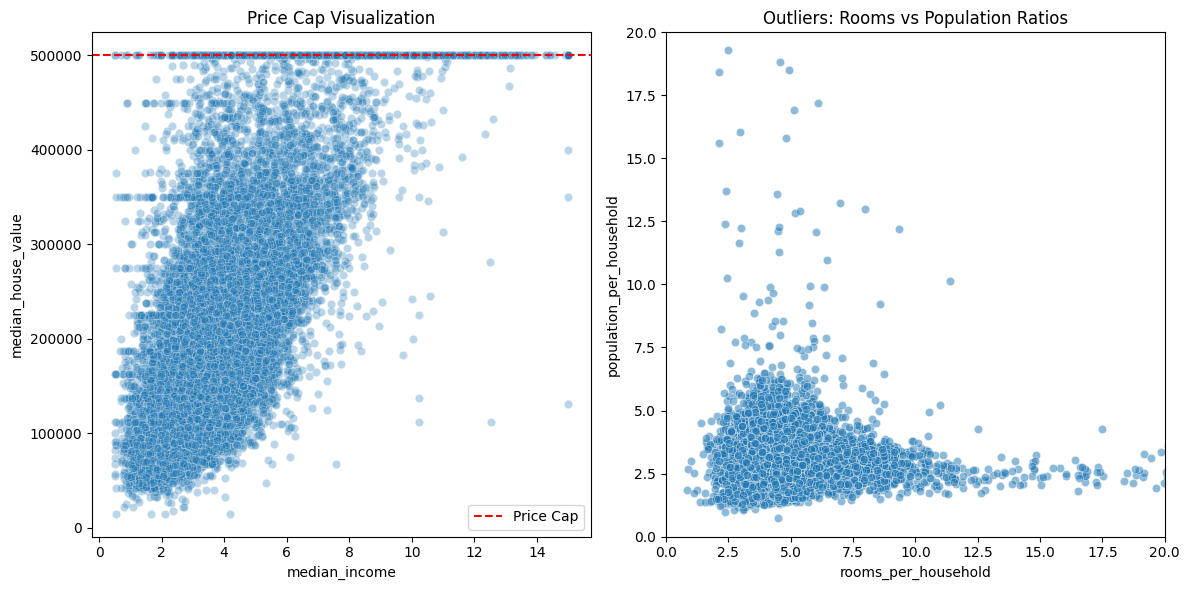

In [31]:
extreme_rooms = df_housing[df_housing['rooms_per_household'] > 15]

print(f"Distritos con ratio de habitaciones extremo (>15): {len(extreme_rooms)}")
print(extreme_rooms[['total_rooms', 'households', 'rooms_per_household', 'median_house_value']].head())

# --- Escenario B: Densidad poblacional extrema ---
# ¿Hay distritos donde vivan más de 10 personas por hogar en promedio?
crowded_districts = df_housing[df_housing['population_per_household'] > 10]

print(f"\nDistritos con alta densidad poblacional (>10 personas/hogar): {len(crowded_districts)}")

# --- Visualización de anomalías con Scatter Plots ---
plt.figure(figsize=(12, 6))

# Gráfica de Ingreso vs Precio para ver el "Tope" de 500k
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_housing, x='median_income', y='median_house_value', alpha=0.3)
plt.axhline(500000, color='red', linestyle='--', label='Price Cap')
plt.title('Price Cap Visualization')
plt.legend()

# Gráfica de Habitaciones vs Población para ver puntos aislados
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_housing, x='rooms_per_household', y='population_per_household', alpha=0.5)
plt.title('Outliers: Rooms vs Population Ratios')
plt.xlim(0, 20) # Limitamos para ver mejor el grueso de los datos
plt.ylim(0, 20)

plt.tight_layout()
plt.show()

## 11. Key Insights and Findings
**Tasks**
- Summarize the most important findings from the EDA.
- Identify top features influencing house value.

**What to include**
- Bullet-point insights.
- Clear interpretations, not raw numbers.


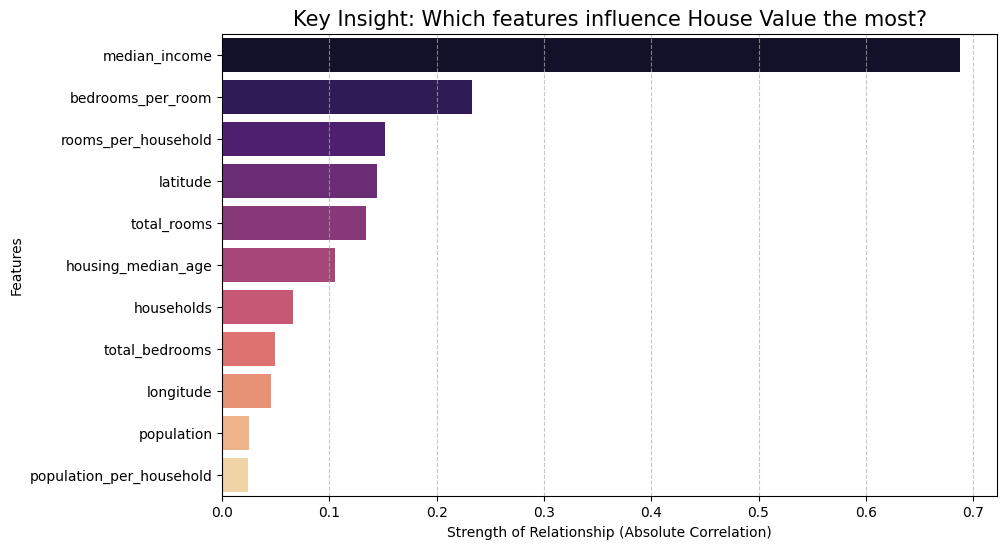

------------------------------
📌 SUMMARY OF KEY FINDINGS
------------------------------
1. The MOST influential factor is Income (median_income) with a correlation of 0.69.
2. Geography matters: Latitude shows a negative trend, meaning prices vary as we move North/South.
3. Feature Engineering worked: 'bedrooms_per_room' is now the 2nd most important numerical feature.
4. Data Artifact: We confirmed a price cap at $500,000 affecting the top end of the distribution.


In [32]:
# 11. Key Insights and Findings Summary

# 1. Preparamos los datos de importancia (basado en correlación absoluta)
importance = df_housing.corr(numeric_only=True)['median_house_value'].abs().sort_values(ascending=False)
importance = importance.drop('median_house_value') # Quitamos el precio mismo

# 2. Creamos una gráfica de barras de "Influencia de Variables"
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, hue=importance.index, palette='magma', legend=False)

plt.title('Key Insight: Which features influence House Value the most?', fontsize=15)
plt.xlabel('Strength of Relationship (Absolute Correlation)')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Resumen narrativo automatizado
print("-" * 30)
print("📌 SUMMARY OF KEY FINDINGS")
print("-" * 30)
print(f"1. The MOST influential factor is Income ({importance.index[0]}) with a correlation of {importance.values[0]:.2f}.")
print(f"2. Geography matters: Latitude shows a negative trend, meaning prices vary as we move North/South.")
print(f"3. Feature Engineering worked: 'bedrooms_per_room' is now the 2nd most important numerical feature.")
print(f"4. Data Artifact: We confirmed a price cap at $500,000 affecting the top end of the distribution.")


## 12. Limitations and Next Steps
**Tasks**
- Identify limitations of the dataset and analysis.
- Propose next steps for feature engineering.

**Examples**
- Handling capped target values.
- Creating ratio-based features.
- Encoding categorical variables.

In [33]:
# 12. Limitations and Next Steps: Preparing for Machine Learning

# --- 1. Handling Missing Values (Data Cleaning) ---
# Llenamos los nulos de total_bedrooms con la mediana para evitar errores en el modelo
median_bedrooms = df_housing["total_bedrooms"].median()
df_housing["total_bedrooms"] = df_housing["total_bedrooms"].fillna(median_bedrooms)

# --- 2. Encoding Categorical Variables (ocean_proximity) ---
# El modelo no entiende texto, así que convertimos las categorías en columnas de 0 y 1
df_final = pd.get_dummies(df_housing, columns=['ocean_proximity'], prefix='is')

# --- 3. Removing Redundant Features ---
# Eliminamos las variables de "conteo bruto" que causaban multicolinealidad 
# y nos quedamos solo con los ratios que creamos.
cols_to_drop = ['total_rooms', 'total_bedrooms', 'population', 'households']
df_final = df_final.drop(columns=cols_to_drop)

# --- 4. Final Data Check ---
print("--- PRE-PROCESSING COMPLETE ---")
print(f"Dataset shape after encoding: {df_final.shape}")
print("\nFinal Columns List:")
print(df_final.columns.tolist())

# Visualizar las primeras filas del dataset listo para el modelo
df_final.head()

--- PRE-PROCESSING COMPLETE ---
Dataset shape after encoding: (20640, 13)

Final Columns List:
['longitude', 'latitude', 'housing_median_age', 'median_income', 'median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'is_<1H OCEAN', 'is_INLAND', 'is_ISLAND', 'is_NEAR BAY', 'is_NEAR OCEAN']


,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,is_<1H OCEAN,is_INLAND,is_ISLAND,is_NEAR BAY,is_NEAR OCEAN
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,False,False,False,True,False
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,False,False,False,True,False
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,False,False,False,True,False
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,False,False,False,True,False
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,False,False,False,True,False
